In [2]:
#Loading all basic libraries
import pandas as pd
import numpy as np
import sklearn

In [3]:
#loading an inbuilt dataset from sklearn datasets module
from sklearn.datasets import load_boston
boston=load_boston()
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

In [4]:
data=pd.DataFrame(boston.data) #Using pandas calling the data into a dataframe
data.columns=boston.feature_names #Assigning the names to the dataframe using the original names 
data['Price']=boston.target #Adding the target variable to the dataset under the name 'Price'
print(data.head(3)) #exploring the data

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  


In [5]:
print(data.info()) #info is used to check str of data as in R

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB
None


In [6]:
print(data.describe()) #describe is used to check summary function as in R

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [7]:
import xgboost as XGB #Package used to build xtreme gradient boosted models
from sklearn.metrics import mean_squared_error as MSE #A well used performance metric used in evaluating the model

In [8]:
#separating x and y variables
X,y =data.iloc[:,:13],data.iloc[:,-1:] #In python two variabels can be assigened different values in a single line of command

In [10]:
X.head(5) #Checking the separation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
y.head(10) #Checking the separation

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [12]:
dmatrix = XGB.DMatrix(data=X,label=y)#converting the data to a dmatrix format will help xgboost give better results

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [40]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
441,9.72418,0.0,18.10,0.0,0.7400,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
172,0.13914,0.0,4.05,0.0,0.5100,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
95,0.12204,0.0,2.89,0.0,0.4450,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65
54,0.01360,75.0,4.00,0.0,0.4100,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80
449,7.52601,0.0,18.10,0.0,0.7130,6.417,98.3,2.1850,24.0,666.0,20.2,304.21,19.31
346,0.06162,0.0,4.39,0.0,0.4420,5.898,52.3,8.0136,3.0,352.0,18.8,364.61,12.67
351,0.07950,60.0,1.69,0.0,0.4110,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49
114,0.14231,0.0,10.01,0.0,0.5470,6.254,84.2,2.2565,6.0,432.0,17.8,388.74,10.45
483,2.81838,0.0,18.10,0.0,0.5320,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42


In [115]:
#XGBclassifer() and XGBregresser() are two classes that can be used for various problems
model = XGB.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 1.0,
                         max_depth = 10, alpha = 100, n_estimators = 150)

In [116]:
#Unlike simple model calls here we build a model then call our data into it separately
model.fit(X_train,y_train)

XGBRegressor(alpha=100, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=1.0, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [117]:
#Finally we now use the model to predict on our test data
preds=model.predict(X_test)

In [118]:
rmse = np.sqrt(MSE(y_test, preds)) #using the mse function previously called on actual and predicted values
print(rmse)
print("RMSE:  %f" % rmse) 

5.334904976093141
RMSE:  5.334905


In [141]:
#The RMSE Value obtained in 10.17. We can build a more robust model using the cross validation technique
params = {"objective":"reg:squarederror",'colsample_bytree': 1.0,'learning_rate': 1.0,
                'max_depth': 5, 'alpha': 8} #We define a param variable to hold the hyperparameters that were used for the previosu model

In [142]:
#the cross validation here has a fold value of 3, meaning 3 validation blocks will be created
cv_results = XGB.cv(dtrain=dmatrix, params=params, nfold=9, #here using the dmatrix format will help gain better results
                    num_boost_round=100,early_stopping_rounds=100,metrics="rmse", as_pandas=True, seed=1234)
#num_boost_rounds just defines number of trees to build like the n_estimators earlier
#Early_stopping_rounds is used to stop building tree if the rmse value stops decreasing after a certain rounds
#finally we choose our evaluation metric to be rmse, and as_pandas means to return the results as a pandas dataframe

In [143]:
#The cv_results from above contains train and test rmse for each boosting round made
print(cv_results.head(50)) #there are as many rows as many trees generated during cv


    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          4.623923        0.394165        5.290763       1.035578
1          3.318141        0.287190        4.921894       1.061388
2          2.662884        0.170856        4.409692       1.079999
3          2.238273        0.132152        4.272951       1.066837
4          1.974391        0.138126        4.200473       0.954593
5          1.762406        0.123749        4.109555       0.941221
6          1.594710        0.108450        4.056008       0.924426
7          1.455171        0.089131        3.996215       0.874460
8          1.353244        0.082660        3.960898       0.896932
9          1.265050        0.069556        3.988566       0.866805
10         1.185688        0.061865        3.976902       0.879733
11         1.118483        0.057713        3.965432       0.864861
12         1.054486        0.048461        3.939703       0.839963
13         1.008880        0.049352        3.936878       0.83

In [144]:
print(cv_results['test-rmse-mean'].tail(1)) #the last tree generated tree boosted will usually have the lowest error

99    3.894071
Name: test-rmse-mean, dtype: float64


In [122]:
xg_reg = XGB.train(params=params, dtrain=dmatrix, num_boost_round=10)
#building another simple XGB model without any cv

In [123]:
# #Visualizing the XGB trees
# import seaborn as sns
# import matplotlib.pyplot as plt

# XGB.plot_tree(xg_reg,num_trees=2)
# plt.rcParams['figure.figsize'] = [50, 10]
# plt.show()

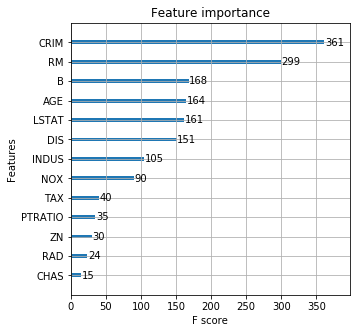

In [124]:
import matplotlib.pyplot as plt
XGB.plot_importance(model)
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


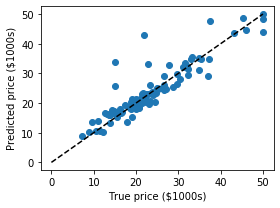

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [45]:
rmse = np.sqrt(MSE(expected, predicted)) #using the mse function previously called on actual and predicted values
print(rmse)
print("RMSE:  %f" % rmse) 

3.953636474486909
RMSE:  3.953636


In [42]:

from sklearn.tree import DecisionTreeRegressor

In [43]:
from sklearn.ensemble import AdaBoostRegressor


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


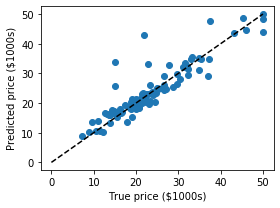

In [48]:
classifier = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1),n_estimators=100)
classifier.fit(X_train,y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

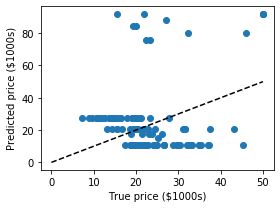

In [174]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=13, n_informative=4, random_state=0, shuffle=False)
regr = AdaBoostRegressor(random_state=0, n_estimators=60)
regr.fit(X, y)  
AdaBoostRegressor( learning_rate=1.0, loss='deviance', n_estimators=60, random_state=0)
predicted = regr.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()


In [175]:
rmse = np.sqrt(MSE(expected, predicted)) #using the mse function previously called on actual and predicted values
print(rmse)
print("RMSE:  %f" % rmse) 

23.02094963499612
RMSE:  23.020950
